# 3 初等的整列


-   [ITP1_2_C](https://onlinejudge.u-aizu.ac.jp/courses/lesson/2/ITP1/2/ITP1_2_C) (Sorting Three Numbers)

下のコードを見る前に，自分で考えてみる。

In [3]:
a, b, c = map(int, input().split())
if b < a: a, b = b, a
if c < a: a, c = c, a
if c < b: b, c = c, b
print(a, b, c)

5 3 81 
3 5 81


In [4]:
a, b, c = map(int, input().split())
if b < a: a, b = b, a
if c < b:
  if c < a: a, b, c = c, a, b
  else: b, c = c, b
print(a, b, c)

7 9 3
3 7 9


In [5]:
a, b, c = map(int, input().split())
if c < b: b, c = c, b
if b < a: a, b = b, a
if c < b: b, c = c, b
print(a, b, c)

9 6 8
6 8 9


In [6]:
A = list(map(int, input().split()))
minj = 0
if A[1] < A[minj]: minj = 1
if A[2] < A[minj]: minj = 2
A[0], A[minj] = A[minj], A[0]
minj = 1
if A[2] < A[minj]: minj = 2
A[1], A[minj] = A[minj], A[1]
print(*A)

8 6 4
4 6 8


♠39文字以内のコードで解決できるか？

## 3.1 ソート：問題にチャレンジする前に


ソートについて知っておくべきこと

-   ライブラリの使い方（Pythonでは，メソッド`.sort`と関数`sorted`）
-   有名なアルゴリズム（簡単なものでは，挿入ソート，バブルソート，選択ソート，シェルソート。第7章に続く）
-   有名なアルゴリズムの計算量（最悪の場合，挿入ソート，バブルソート，選択ソートは $O(n^2)$，シェルソートは $O(n^{1.25})$ 程度。第7章に続く）
-   安定性（同じ値のデータの順序を保つかどうか）

Pythonでのソートの基本

In [11]:
A = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3]
A.sort()
print(A) # A自体が並べ替えられる

[1, 1, 2, 3, 3, 4, 5, 5, 6, 9]


In [12]:
A = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3]
B = sorted(A)
print(B)
print(A) # Aはそのまま

[1, 1, 2, 3, 3, 4, 5, 5, 6, 9]
[3, 1, 4, 1, 5, 9, 2, 6, 5, 3]


いずれにしても，ソートは簡単に実現できる。ではなぜソートについて学ぶのか。

> プログラミングのほぼ**すべて**の重要な側面がソートや探索の文脈中のどこかに現れているはずだ。（TAOCP Vol. 3「序」）

### 安定性


安定なソート。教科書p.52のデータを一部変えて試す。♠表形式のデータは**データフレーム**という形式で扱うことが多いが，ここでは多次元リストで表現する（後期「データサイエンス演習」）。

In [13]:
data = [["player1", 70, 80],
        ["player2", 90, 80],
        ["player3", 95, 60],
        ["player4", 80, 95]]

sorted(data, key=lambda x: x[2])

[['player3', 95, 60],
 ['player1', 70, 80],
 ['player2', 90, 80],
 ['player4', 80, 95]]

安定でないソート（3.4節 選択ソート）

> データをコピーしてから，第3要素で選択ソートでソートする。<br>
> （ここにdataを貼り付ける。）

生成されるコードを修正した例を示す。

In [14]:
%%writefile unstable_sort.py
data = [["player1", 70, 80],
        ["player2", 90, 80],
        ["player3", 95, 60],
        ["player4", 80, 95]]

import copy

# データをコピー
sorted_data = copy.deepcopy(data)

# 選択ソートの実装（第3要素でソート）
n = len(sorted_data)
for i in range(n - 1):
    min_index = i
    for j in range(i + 1, n):
        if sorted_data[j][2] < sorted_data[min_index][2]:  # 第3要素（インデックス2）で比較
            min_index = j
    # 最小値の要素を交換
    sorted_data[i], sorted_data[min_index] = sorted_data[min_index], sorted_data[i]

sorted_data

Writing unstable_sort.py


### in-place性


元のデータを書き替えるものをin-placeという。

-   メソッド`sort`はin-placeである。元のリストを並べ替える。
-   関数`sorted`：はin-placeではない。元のリストはそのままで，新しいリストを作る。

In [15]:
A = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3]
A.sort()
print(A) # A自体が並べ替えられる

[1, 1, 2, 3, 3, 4, 5, 5, 6, 9]


In [16]:
A = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3]
B = sorted(A) # Aを並べ替えて新しいリストBを作る。
print(B)
print(A) # Aはそのまま

[1, 1, 2, 3, 3, 4, 5, 5, 6, 9]
[3, 1, 4, 1, 5, 9, 2, 6, 5, 3]


## ナイーブなソート

In [17]:
def simple_sort(A):
  n = len(A)
  for i in range(n - 1):
    for j in range(i + 1, n):
      if A[i] > A[j]:
        A[i], A[j] = A[j], A[i]

このアルゴリズムについて，二つの点を考える。

-   正当性：アルゴリズムは正しいのか？
-   アルゴリズム解析：アルゴリズムは速いのか？

### 正当性


アルゴリズムの正しさをどう納得するか。

-   テスト（確実ではないが，比較的簡単）
-   ♠証明（確実だが，比較的難しい）

#### テスト


これでソートできることを確認する。

In [19]:
A = [10, 20, 55, 4, 15, 12]
simple_sort(A)

for i in range(len(A) - 1):
  if A[i] > A[i + 1]:
    print("Error")

テストにパスしたのは，たまたま正しい結果が出るデータを入力したからかもしれないことに注意。

#### ♠証明


証明方法：ループ不変条件（ループの前後で常に成り立つ条件）を数学的帰納法で証明する。

`simple_sort`のループ不変条件：外側の $i$ のループの開始時点で，$A[0]<\ldots<A[i-1]$，かつ，$A[i-1], \ldots, A[n-1]$ では $A[i-1]$ が最小である。

この条件が常に成立することを数学的帰納法で証明すればよい。

AIが証明してくれるかもしれないが，それっぽいでたらめを出してくる危険もある。

> このソートの正当性をループ不変条件を設定して証明して<br/>
> （ここに関数を貼り付ける。）

### アルゴリズム解析


アルゴリズムの性能をどう調査するか。

-   時間計算量
-   空間計算量

ここでは時間計算量を調べる。

| 行  | 命令                      | コスト | RAMモデルでのおおよその実行回数                       |
|------------------|------------------|------------------|------------------|
| 1   | `n = len(A)`              | $c_1$  | $1$                                                   |
| 2   | `for i in range(n-1):`    | $c_2$  | $n-1$                                                 |
| 3   | `for j in range(i, n):`   | $c_3$  | $\displaystyle\sum_{i=0}^{n-2}(n-i)=\frac{(n-1)n}{2}$ |
| 4   | `if A[i] > A[j]:`         | $c_4$  | $\displaystyle\sum_{i=0}^{n-2}(n-i)=\frac{(n-1)n}{2}$ |
| 5   | `A[i], A[j] = A[j], A[i]` | $c_5$  | $\displaystyle\sum_{i=0}^{n-2}t_i$                    |

最良（実行時間が最短）なのは，対象のデータが昇順にソートされている場合で，5行目は1回も実行されない。よって，実行時間は $c_1+c_2(n-1)+(c_3+c_4)\frac{(n-1)n}{2}=O(n^2)$ である。

最悪（実行時間が最長）なのは，対象のデータが降順にソートされている場合で，$t_i=n-i$ だから，5行目は $\sum_{i=0}^{n-2}(n-i)=\frac{(n-1)n}{2}$ 回実行される。よって，実行時間は $c_1+c_2(n-1)+(c_3+c_4+c_5)\frac{(n-1)n}{2}=O(n^2)$ である。

結局，このナイーブなソートの計算量は $O(n^2)$ である（$\Theta(n^2)$ でもある）。

## 3.2 挿入ソート


アルゴリズム図鑑（無料版）

問題：[ALDS1_1_A](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/1/ALDS1_1_A) (Insertion Sort)

♠「挿入ソートはある程度整列されたデータに対しては高速に動作する特長を持ちます（教科書p.58）」を確かめる。

♠正当性：CLRS 2.1節を参照。

時間計算量：最良の場合の時間計算量は $O(n)$，最悪の場合の時間計算量は $O(n^2)$ である（参照：教科書p.58，CLRS 2.2節）。

In [ ]:
%%writefile input.


In [20]:
%%writefile test.py
def insertionSort(A, N) #N個の要素を含む0-オリジンの配列A
  for i in range(1,N)
    print(*A)
    v = A[i]
    j = i - 1
    while j >= 0 and A[j] > v
      A[j+1] = A[j]
      j--
    A[j+1] = v
N=int(input())
A=list(map(int,input().split()))

insertionSort(A, N)
print(*A)

Writing test.py


## 3.3 バブルソート


<iframe width="560" height="315" src="https://www.youtube.com/embed/k4RRi_ntQc8?si=1FCkVkdsA6ktzjP8&amp;start=34" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen>
</iframe>

参照：[Obama on sorting 1M integers: Bubble sort the wrong way to go](https://www.righto.com/2012/11/obama-on-sorting-1m-integers-bubble.html)

アルゴリズム図鑑（無料版）

問題：[ALDS1_2_A](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/2/ALDS1_2_A) (Bubble Sort)

♠`flag`の効果を調べる。

♠7.3節で扱うクイックソートとバブルソートの性能を比較してみよう。クイックソートは速いと言うが，データが少ない場合は，あまり変わらない。

> Pythonでバブルソートとクイックソートを実装して性能を比較する。「サイズnのランダムなリストのソートを1000回ずつ実行する」のにかかる時間を計る。nは5, 10, 15, …, 50とする。正しくソートできているかどうかを，sorted()を使って確認するようにして。

生成されるコードを修正した例を示す。

Measuring for n=5...
Measuring for n=10...
Measuring for n=15...
Measuring for n=20...
Measuring for n=25...
Measuring for n=30...
Measuring for n=35...
Measuring for n=40...
Measuring for n=45...
Measuring for n=50...
Measuring for n=55...
Measuring for n=60...
Measuring for n=65...
Measuring for n=70...
Measuring for n=75...
Measuring for n=80...
Measuring for n=85...
Measuring for n=90...
Measuring for n=95...
Measuring for n=100...


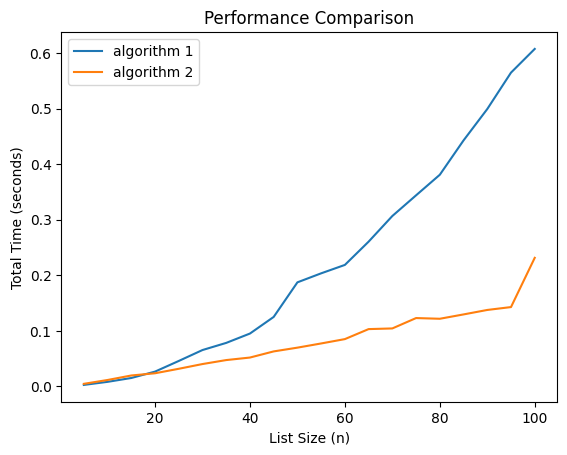

In [21]:
import time
import random
import matplotlib.pyplot as plt

def bubble_sort(arr):
    n = len(arr)
    flag = True
    while flag:
        flag = False
        for j in range(n-1, 0, -1):
            if arr[j] < arr[j-1]:
                arr[j], arr[j-1] = arr[j-1], arr[j]
                flag = True
    return arr

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

def measure_time(sort_func, n, iterations=1000):
    total_time = 0
    for _ in range(iterations):
        arr = [random.randint(0, 1000) for _ in range(n)]
        arr_copy = arr.copy()
        start_time = time.time()
        arr = sort_func(arr)
        if arr != sorted(arr_copy):
            raise ValueError("Sorting failed")
        total_time += time.time() - start_time
    return total_time

sizes = list(range(5, 101, 5))
algorithm1_times = []
algorithm2_times = []

for n in sizes:
    print(f"Measuring for n={n}...")
    algorithm1_times.append(measure_time(bubble_sort, n))
    algorithm2_times.append(measure_time(quick_sort, n))

plt.plot(sizes, algorithm1_times, label='algorithm 1')
plt.plot(sizes, algorithm2_times, label='algorithm 2')
plt.xlabel('List Size (n)')
plt.ylabel('Total Time (seconds)')
plt.title('Performance Comparison')
plt.legend()
plt.show()

## 3.4 選択ソート


アルゴリズム図鑑（無料版）

教科書p.65の擬似コードは次のように修正してよい。

    1 selectionSort(A, N) // N個の要素を含む0-オリジンの配列A
    2   for i が 0 から N-2 まで
    3     minj = i
    4     for j が i+1 から N-1 まで
    5       if A[j] < A[minj]
    6         minj = j
    7     A[i] と A[minj] を交換

問題：[ALDS1_2_B](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/2/ALDS1_2_B) (Selection Sort)

♠「flagを用いない単純なバブルソートと選択ソートは，データに依存しない比較演算を行いますが，挿入ソートはデータに依存する挙動をし，高速になる場合があります。（教科書p.68）」

正当性と時間計算量：時間計算量は$O(n^2)$（$\Theta(n^2)$ でもある）。CLRSの練習問題 2.2-2を参照。

## ♠3.5 安定なソート


問題：[ALDS1_2_C](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/2/ALDS1_2_C) (Stable Sort)

valueはrankというのが一般的かもしれないが・・・

> suitとvalueを持つクラスCardをPythonで作る。インスタンスは長さ2の文字列で初期化する。1文字目がsuit，2文字目を整数に変換した結果がvalueである。例えばCard(“H4”)は，suitがH，valueが4のインスタンスである。

In [ ]:
%%writefile card.py
class Card:
    def __init__(self, s):
        self.suit = s[0]
        self.value = int(s[1])

    def __repr__(self):
        return self.suit + str(self.value)

## ♠3.6 シェルソート


Donald L. Shellが1959年に提案したソートアルゴリズムである。

問題：[ALDS1_2_D](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/2/ALDS1_2_D) (Shell Sort)

ヒント：教科書p.77のgを使えばよい。TAOCP 5.2.1項によると，$$g_0=1,\;g_{i+1}=3g_i+1\;\text{とし，}g_{t+1}>N\;\text{になったら，}g_{t-1}\;\text{で終わりにする。}$$gがnより大きくなってもプログラムは動くが，オンラインジャッジは通らない。

前に扱った挿入ソート（教科書p.54）と，ここで使う挿入ソート（同p.74）を比較する。

    1 insertionSort(A, N) // N個の要素を含む0-オリジンの配列A
    2   for i が 1 から N-1 まで
    3     v = A[i]
    4     j = i - 1
    5     while j >= 0 かつ A[j] > v
    6       A[j+1] = A[j]
    7       j--
    8     A[j+1] = v

    1 insertionSort(A, n, g)
    2     for i = g to n-1
    3         v = A[i]
    4         j = i - g
    5         while j >= 0 && A[j] > v
    6             A[j+g] = A[j]
    7             j = j - g
    8             cnt++
    9         A[j+g] = v

**練習**：どのような違いがあるか，まとめてみよう。

-   `cnt`で値の交換回数を数えている。♠教科書p.74の擬似コードを最小限の変更で実装しようとすると，`cnt`はグローバル変数になる。グローバル変数はあまり使いたくないのだが，ここではそれでよい。
-   （自分で考える）

♠バブルソートとクイックソートを比べる先の実験と同じようにして，シェルソートとクイックソートを比べてみよう。

## ♠おまけ


要素数100くらいで使う場合，次のソートは，挿入ソートより遅いが，バブルソートより速いことを確かめてみよう。

    def fung_sort(A):
      n = len(A)
      for i in range(n):
        for j in range(n):
          if A[i] < A[j]:
            A[i], A[j] = A[j], A[i]

出典：[Stanley P. Y. Fung. Is this the simplest (and most surprising) sorting algorithm ever?](https://arxiv.org/abs/2110.01111)

参照：https://github.com/E869120/math-algorithm-book/blob/main/editorial/chap3-6/chap3-6.pdf

## 宿題


以下の問題をAC（Accepted）にする。Pythonを使うこと。

-   [ITP1_2_C](https://onlinejudge.u-aizu.ac.jp/courses/lesson/2/ITP1/2/ITP1_2_C) (Sorting Three Numbers)
-   [ALDS1_1_A](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/1/ALDS1_1_A) (Insertion Sort)
-   [ALDS1_2_A](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/2/ALDS1_2_A) (Bubble Sort)
-   [ALDS1_2_B](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/2/ALDS1_2_B) (Selection Sort)
-   ♠[ALDS1_2_C](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/2/ALDS1_2_C) (Stable Sort)
-   ♠[ALDS1_2_D](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/2/ALDS1_2_D) (Shell Sort)

以上